In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
dfx = pd.read_csv("linearX.csv")
dfy=  pd.read_csv("linearY.csv")

print(dfx.shape)
print(dfy.shape)

(99, 1)
(99, 1)


In [0]:
x = dfx.values
y = dfy.values

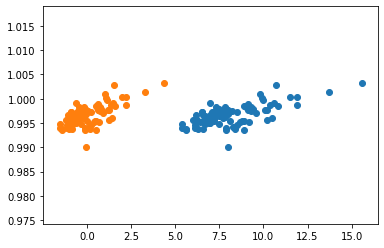

In [8]:
plt.scatter(x,y)
X= (x-x.mean())/(x.std())
Y=y
plt.scatter(X,Y)
plt.show()

In [0]:
### Gradient Descent Algorithm
# -Take any random value of theta
# - Repeat until Convergence
#     -Update theta according to the rule

def hypothesis(x,theta):
    return theta[0] + theta[1]*x

def error(X,Y,theta):
    
    m= X.shape[0]
    error=0
    
    for i in range(m):
        hx=hypothesis(X[i],theta)
        error += (hx-Y[i]) ** 2
        
    return error
    
### Implementing the Gradient Descent Algorithm

def gradient(X,Y,theta):
    
    grad= np.zeros((2,))
    m= X.shape[0]
    
    for i in range(m):
        hx=hypothesis(X[i],theta)
        grad[0] += (hx-Y[i])
        grad[1] += (hx-Y[i])* X[i]
        
    return grad
    
def gradientDescent(X,Y,learning_rate=0.001):
    
    theta=np.zeros((2,))
    itr=0
    max_itr=100
    
    error_list = []
    theta_list = []
    
    while(itr<=max_itr):
        grad = gradient(X,Y,theta)
        e= error(X,Y,theta)
        
        error_list.append(e)
        theta_list.append((theta[0],theta[1]))
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        itr += 1
        
    return theta, error_list,theta_list

In [0]:
final_theta,error_list,theta_list= gradientDescent(X,Y)

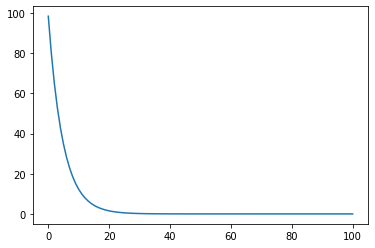

In [11]:
plt.plot(error_list)
plt.show()

In [12]:
print(final_theta)

[0.99660749 0.0013579 ]


In [13]:
### Plotting the line for testing the data

xtest = np.linspace(-2.5,15,6)
print(xtest)

[-2.5  1.   4.5  8.  11.5 15. ]


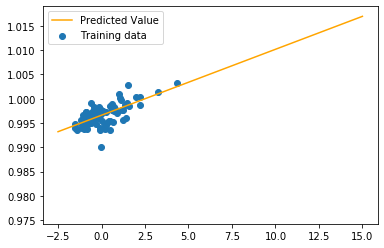

In [14]:
plt.scatter(X,Y,label = "Training data")
plt.plot(xtest,hypothesis(xtest,final_theta),color = "orange", label="Predicted Value")
plt.legend()
plt.show()

In [0]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


In [16]:
a = [-3,-2,-1,0,1,2,3]
b = [-4,-3,-2,-1,0,1,2,3,4]

a,b = np.meshgrid(a,b)

print(a)
print(b)

[[-3 -2 -1  0  1  2  3]
 [-3 -2 -1  0  1  2  3]
 [-3 -2 -1  0  1  2  3]
 [-3 -2 -1  0  1  2  3]
 [-3 -2 -1  0  1  2  3]
 [-3 -2 -1  0  1  2  3]
 [-3 -2 -1  0  1  2  3]
 [-3 -2 -1  0  1  2  3]
 [-3 -2 -1  0  1  2  3]]
[[-4 -4 -4 -4 -4 -4 -4]
 [-3 -3 -3 -3 -3 -3 -3]
 [-2 -2 -2 -2 -2 -2 -2]
 [-1 -1 -1 -1 -1 -1 -1]
 [ 0  0  0  0  0  0  0]
 [ 1  1  1  1  1  1  1]
 [ 2  2  2  2  2  2  2]
 [ 3  3  3  3  3  3  3]
 [ 4  4  4  4  4  4  4]]


In [17]:
m = a.shape[0]
n = a.shape[1]

print(m,n)

for i in range(m):
    for j in range(n):
        print("(%d %d)" %(b[i,j],a[i,j]),end ="")
    

9 7
(-4 -3)(-4 -2)(-4 -1)(-4 0)(-4 1)(-4 2)(-4 3)(-3 -3)(-3 -2)(-3 -1)(-3 0)(-3 1)(-3 2)(-3 3)(-2 -3)(-2 -2)(-2 -1)(-2 0)(-2 1)(-2 2)(-2 3)(-1 -3)(-1 -2)(-1 -1)(-1 0)(-1 1)(-1 2)(-1 3)(0 -3)(0 -2)(0 -1)(0 0)(0 1)(0 2)(0 3)(1 -3)(1 -2)(1 -1)(1 0)(1 1)(1 2)(1 3)(2 -3)(2 -2)(2 -1)(2 0)(2 1)(2 2)(2 3)(3 -3)(3 -2)(3 -1)(3 0)(3 1)(3 2)(3 3)(4 -3)(4 -2)(4 -1)(4 0)(4 1)(4 2)(4 3)

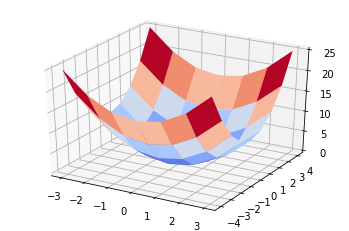

In [18]:
fig = plt.figure()
axes = fig.gca(projection ='3d')
axes.plot_surface(a,b,a**2+b**2,cmap = 'coolwarm')
plt.show()

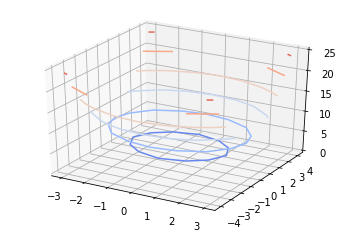

In [19]:
fig = plt.figure()
axes = fig.gca(projection ='3d')
plt.contour(a,b,a**2+b**2,cmap = 'coolwarm')
plt.show()

In [0]:
### Implementing the 3D Loss
T0 = np.arange(-2,3,0.01)
T1 = np.arange(-2,3,0.01)

T0,T1 = np.meshgrid(T0,T1)

J = np.zeros(T0.shape)

m = T0.shape[0]
n = T0.shape[1]

for i in range(m):
    for j in range(n):
        J[i,j] = np.sum((Y-T1[i,j]*X - T0[i,j])**2)

In [0]:
theta_list = np.array(theta_list)

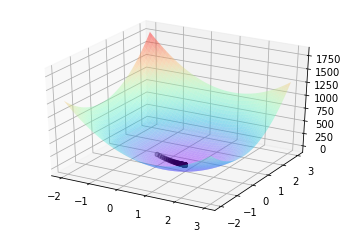

In [22]:
fig = plt.figure()
axes = fig.gca(projection ='3d')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list,c='k')
axes.plot_surface(T0,T1,J,cmap = 'rainbow',alpha=0.4)
plt.show()

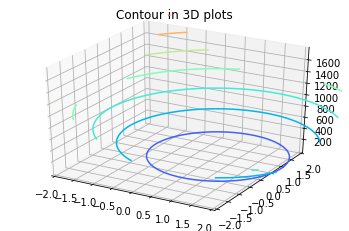

In [23]:
fig = plt.figure()
axes = fig.gca(projection ='3d')
axes.contour(T0,T1,J,cmap = 'rainbow')
axes.set_xlim([-2,2])
axes.set_ylim([-2,2])
plt.title("Contour in 3D plots")
plt.show()

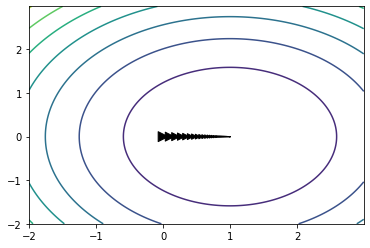

In [24]:
plt.contour(T0,T1,J)
plt.scatter(theta_list[:,0],theta_list[:,1],error_list,c='k',marker='>')
plt.show()

### Linear Form Solution in Linear Regression

In [0]:
from sklearn.datasets import make_regression

In [26]:
X,Y = make_regression(n_samples=400,n_features=1,n_informative=1,noise=1.8,random_state=11)
Y=Y.reshape((-1,1))

print(X.shape)
print(Y.shape)

(400, 1)
(400, 1)


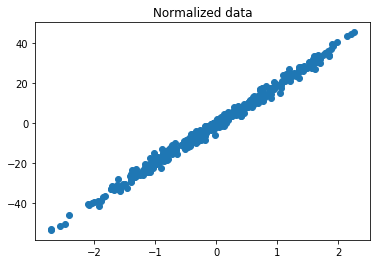

In [27]:
X= (X-X.mean())/X.std()
Y=Y

plt.figure()
plt.scatter(X,Y)
plt.title("Normalized data")
plt.show()

In [28]:
ones = np.ones((X.shape[0],1))
X_ = np.hstack((X,ones))
print(X_.shape)
print(X_[:5,:])

(400, 2)
[[-0.86881353  1.        ]
 [ 1.04796658  1.        ]
 [-0.2019676   1.        ]
 [-0.34017061  1.        ]
 [ 0.13317349  1.        ]]


In [0]:
def predict(X,theta):
    return np.dot(X,theta)

def getLinearClosedForm(X,Y):
    Y= np.mat(Y)
    
    firstPart = np.dot(X.T,X)
    lastPart  = np.dot(X.T,Y)
    
    theta=np.linalg.pinv(firstPart)*lastPart
    return theta
    

In [30]:
theta = getLinearClosedForm(X_,Y)
print(theta)

[[19.45877082]
 [-0.29187892]]


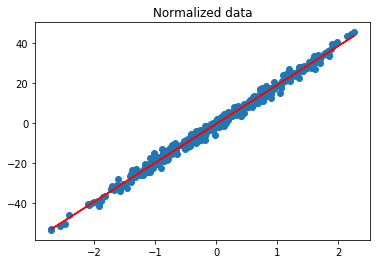

In [31]:
plt.figure()
plt.scatter(X,Y)
plt.plot(X,predict(X_,theta),color="red")
plt.title("Normalized data")
plt.show()